# Mod 3 Final Project

## Student Info

- Name: Jamaal Smith
- Cohort: 
- Instructor: James Irving, Phd


## Instructions:

- Open and read the project assignment and guidelines in `MOD_PROJECT_README.ipynb`
- Review the hypothesis testing workflow found in this repo's `README.md` and at the bottom of the `MOD_PROJECT_README.ipynb`
- 3 functions from study group/learn.co lessons have been provided inside `functions.py`
    - `Cohen_d`, `find_outliers_IQR`,`find_outliers_Z`

<img src="https://raw.githubusercontent.com/jirvingphd/dsc-mod-3-project-online-ds-ft-100719/master/Northwind_ERD_updated.png">

In [32]:
!pip install -U fsds_100719
from fsds_100719.imports import *

import pandas as pd


Requirement already up-to-date: fsds_100719 in c:\anaconda\envs\learn-env\lib\site-packages (0.7.4)
Requirement not upgraded as not directly required: selenium in c:\anaconda\envs\learn-env\lib\site-packages (from fsds_100719) (3.141.0)
Requirement not upgraded as not directly required: scipy in c:\anaconda\envs\learn-env\lib\site-packages (from fsds_100719) (1.1.0)
Requirement not upgraded as not directly required: ipywidgets in c:\anaconda\envs\learn-env\lib\site-packages (from fsds_100719) (7.5.1)
Requirement not upgraded as not directly required: pandas-profiling in c:\anaconda\envs\learn-env\lib\site-packages (from fsds_100719) (2.4.0)
Requirement not upgraded as not directly required: wordcloud in c:\anaconda\envs\learn-env\lib\site-packages (from fsds_100719) (1.6.0)
Requirement not upgraded as not directly required: IPython in c:\anaconda\envs\learn-env\lib\site-packages (from fsds_100719) (6.5.0)
Requirement not upgraded as not directly required: pyperclip in c:\anaconda\envs\

pexpect 4.6.0 requires ptyprocess>=0.5, which is not installed.
phik 0.9.9 has requirement joblib>=0.14.1, but you'll have joblib 0.14.0 which is incompatible.
astroid 2.3.3 has requirement six~=1.12, but you'll have six 1.11.0 which is incompatible.
You are using pip version 10.0.1, however version 20.0.2 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


# PROJECT

# Hypothesis 1

> Does discount amount have a statistically significant effect on the quantity of a product in an order? If so, at what level(s) of discount?

- $H_0$: A product's discount has no effect on the quantity of a product in an order
- $H_A$: A product's discount does have an effect on the quantity of a product in an order

In [6]:
import sqlite3
connect = sqlite3.connect('Northwind_small.sqlite')
cur = connect.cursor()
cur.execute("""SELECT * FROM OrderDetail""")
df = pd.DataFrame(cur.fetchall())
df.columns = [x[0] for x in cur.description]
df.head()

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount
0,10248/11,10248,11,14.0,12,0.0
1,10248/42,10248,42,9.8,10,0.0
2,10248/72,10248,72,34.8,5,0.0
3,10249/14,10249,14,18.6,9,0.0
4,10249/51,10249,51,42.4,40,0.0


In [15]:
df['Groups'] = df['Discount']>0
df['Groups'] = df['Groups'].map({True:'Discounted',False:'Full Price'})
df.drop('Discounted',axis = 1)
df.head(20)

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount,Discounted,Groups
0,10248/11,10248,11,14.0,12,0.00,Full Price,Full Price
1,10248/42,10248,42,9.8,10,0.00,Full Price,Full Price
2,10248/72,10248,72,34.8,5,0.00,Full Price,Full Price
3,10249/14,10249,14,18.6,9,0.00,Full Price,Full Price
4,10249/51,10249,51,42.4,40,0.00,Full Price,Full Price
5,10250/41,10250,41,7.7,10,0.00,Full Price,Full Price
6,10250/51,10250,51,42.4,35,0.15,Discounted,Discounted
7,10250/65,10250,65,16.8,15,0.15,Discounted,Discounted
8,10251/22,10251,22,16.8,6,0.05,Discounted,Discounted
9,10251/57,10251,57,15.6,15,0.05,Discounted,Discounted


- The data is numerical and we are comparing two groups. Thus, we must employ a 2-sample T-test. TO complete this test, we must make sure that the data meets the following assumptions: no significant outliers, normality and equal variance

## Test for outliers

In [22]:
## To better organize data based on whether an item was full-priced or not, we can create dictionaries
groups = {}
for grp_name in df['Groups'].unique():
    groups[grp_name] = df.groupby('Groups').get_group(grp_name)['Quantity']
groups

{'Full Price': 0        12
 1        10
 2         5
 3         9
 4        40
 5        10
 10       20
 13       40
 14       20
 15       42
 16       40
 19       21
 20       20
 21       35
 22       25
 23       30
 24       15
 25       12
 26       25
 27        6
 28       15
 32       10
 33        1
 35       50
 38       20
 39       20
 41       15
 42        2
 44       28
 47       35
        ... 
 2088      4
 2089     10
 2090     15
 2093     30
 2097     12
 2100     55
 2103      3
 2104     42
 2105     35
 2106      9
 2110     20
 2114     20
 2117      8
 2118     40
 2119     22
 2120    130
 2121     10
 2122     20
 2131      4
 2132      1
 2136      1
 2138      4
 2142      2
 2143      1
 2145      3
 2147      2
 2148      2
 2151      1
 2153      4
 2154      2
 Name: Quantity, Length: 1317, dtype: int64, 'Discounted': 6       35
 7       15
 8        6
 9       15
 11      40
 12      25
 17      15
 18      21
 29      50
 30      65
 31       6
 34

C:\anaconda\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



[Text(0, 0.5, 'Density'), Text(0.5, 1.0, 'Quantities Ordered by Price Type')]

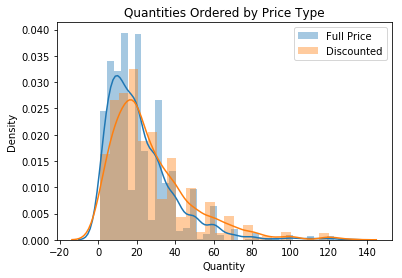

In [26]:
#Visualize the data to get sense of present outlier

for k,v in groups.items():
    sns.distplot(v,label = k)
ax = plt.gca()
ax.legend()
ax.set(title = 'Quantities Ordered by Price Type',ylabel='Density')

In [34]:
import Functions

ModuleNotFoundError: No module named 'Functions'

In [33]:
#Identifying Outliers

for k,v in groups.items():
    outliers = find_outliers_z(v)
    print(f '[i] Found (outliers.sum()))

NameError: name 'find_outliers_z' is not defined